In [1]:
# Las de rigor
import numpy as np
import pandas as pd

# Plots 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,8)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14

pd.options.display.float_format = '{:.4f}'.format

In [435]:
jugadores = pd.read_csv('wyscout_continente_americano.csv')
jugadores.head(10)

,index,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_short_medium_pass_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,...,total_matches,touch_in_box_avg,vertical_passes_avg,weight,xg_assist,xg_assist_avg,xg_shot,xg_shot_avg,yellow_cards,yellow_cards_avg
0,0,28.5700,59.8300,83.3800,81.7500,87.3400,34.0000,1.2300,25.8100,23,...,58,3.1700,9.4000,72,3.3900,0.0700,15.0600,0.3000,5,0.1000
1,1,22.6200,59.0900,82.0200,76.7400,89.6200,57.8900,2.0500,22.7300,18,...,39,3.5700,8.9700,64,3.7100,0.1200,6.7600,0.2100,5,0.1600
2,2,24.2400,45.9000,83.1300,78.1900,86.2300,28.5700,4.3300,41.1300,22,...,34,2.3000,12.5200,72,1.9400,0.0700,4.3700,0.1500,11,0.3800
3,3,23.2600,57.1400,82.3000,77.4000,85.2000,43.0800,2.7300,36.6700,20,...,40,1.1500,17.4500,73,2.7200,0.0800,3.5900,0.1100,3,0.0900
4,4,52.9400,56.2500,79.7000,78.2600,81.3300,37.5000,4.4500,38.6000,17,...,22,5.1600,5.3100,70,2.0000,0.1600,6.0100,0.4700,1,0.0800
5,5,38.3300,63.3800,76.8600,74.2900,81.1600,44.8300,0.9700,29.6300,25,...,29,2.4900,9.9400,63,2.8700,0.1000,5.8600,0.2100,1,0.0400
6,6,28.5700,50.8600,80.6300,84.5400,85.0900,38.4600,0.7900,14.2900,23,...,53,3.7900,7.3700,73,5.5700,0.1100,28.3500,0.5300,19,0.3600
7,7,31.5800,46.3900,80.5100,73.8900,86.4100,55.0000,4.0500,33.3300,23,...,41,1.3800,11.0200,72,2.6500,0.0700,2.6400,0.0700,14,0.3800
8,8,42.8600,63.6400,82.9300,66.6700,84.6200,55.5600,3.2300,50.0000,22,...,15,3.5100,3.8000,78,0.6500,0.0600,4.8300,0.4600,0,0.0000
9,9,17.3900,47.2200,87.1500,89.5500,89.0800,33.3300,3.1100,31.7100,21,...,31,1.7800,15.6300,65,1.4600,0.0600,6.4400,0.2400,5,0.1900


In [436]:
jugadores.shape

(8070, 111)

In [437]:
# Eliminar las columnas que contienen información redundante y/o irrelevante 
# ojo con deep_completed_cross_avg

jugadores_1 = jugadores.drop(columns=['index', 'assists', 'birth_country_code', 'birth_date', 'birth_day', 'contract_expires',
                                      'corners_taken_avg',
                                      'cross_to_goalie_box_avg', 'current_team_color', 'current_team_logo',
                                      'direct_free_kicks_on_target_percent',
                                      'direct_free_kicks_taken_avg', 'free_kicks_taken_avg', 'goals', 'goals_avg',
                                      'head_goals', 'head_goals_avg', 'image', 'name', 'non_penalty_goal',
                                      'non_penalty_goal_avg', 'on_loan', 'passport_country_codes', 
                                      'passport_country_names', 'penalties_conversion_percent', 'penalties_taken',
                                      'positions', 'red_cards', 'shots', 'total_matches', 'xg_assist', 'xg_shot',
                                      'yellow_cards'])

In [438]:
# 31 columnas eliminadas
jugadores_1.shape

(8070, 78)

In [439]:
jugadores_columns = [col for col in jugadores_1.columns.values if col not in ['current_team_name',
                                                                              'domestic_competition_name',
                                                                              'full_name',
                                                                             'id', 'market_value',
                                                                             'primary_position',
                                                                             'primary_position_percent',
                                                                             'secondary_position', 
                                                                             'secondary_position_percent',
                                                                             'third_position',
                                                                             'third_position_percent',
                                                                             'weight']]
jugadores_numeric = jugadores_1[jugadores_columns]

In [440]:
# función que arroja todos los pares de variables con correlación mayor a 8
corr_matrix = jugadores_numeric.corr().reset_index()
corr = []
def high_corr(row):
    global corr
    for el in corr_matrix.columns[1:]:
        if row[el] > 0.8 and row[el] < 1:
            corr.append((el,row['index'], row[el]))

In [441]:
corr_matrix.apply(high_corr, axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
      ... 
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
57    None
58    None
59    None
60    None
61    None
62    None
63    None
Length: 64, dtype: object

In [442]:
corr

[('accurate_short_medium_pass_percent',
  'accurate_passes_percent',
  0.8980520228795889),
 ('successful_forward_passes_percent',
  'accurate_passes_percent',
  0.8002871403582047),
 ('successful_vertical_passes_percent',
  'accurate_passes_percent',
  0.8402258671136507),
 ('accurate_passes_percent',
  'accurate_short_medium_pass_percent',
  0.8980520228795889),
 ('deep_completed_cross_avg', 'crosses_avg', 0.9205464422541493),
 ('pass_to_penalty_area_avg', 'crosses_avg', 0.8062916858546144),
 ('crosses_avg', 'deep_completed_cross_avg', 0.9205464422541493),
 ('successful_attacking_actions_avg', 'dribbles_avg', 0.9509289935484195),
 ('long_passes_avg', 'forward_passes_avg', 0.8342370485761581),
 ('passes_avg', 'forward_passes_avg', 0.8113336220824123),
 ('progressive_pass_avg', 'forward_passes_avg', 0.9331902651419479),
 ('possession_adjusted_interceptions',
  'interceptions_avg',
  0.9710416784761695),
 ('successful_defensive_actions_avg', 'interceptions_avg', 0.9447350236654747),
 ('

### Observaciones 
Variables fuertemente correlacionadas 

'possession_adjusted_tackle', 'tackle_avg', 0.9872834879330896
'passes_avg', 'short_medium_pass_avg', 0.9786438231141981
'interceptions_avg','possession_adjusted_interceptions', 0.9710416784761695
'dribbles_avg', 'successful_attacking_actions_avg', 0.9509289935484195
'interceptions_avg', 'successful_defensive_actions_avg', 0.9447350236654747
'forward_passes_avg', 'progressive_pass_avg', 0.9331902651419479
'passes_avg', 'vertical_passes_avg', 0.9220211447092109

Quitar: 'possession_adjusted_tackle', 'short_medium_pass_avg', 'possession_adjusted_interceptions', 'successful_attacking_actions_avg', 'interceptions_avg', 'forward_passes_avg', 'vertical_passes_avg'

In [443]:
jugadores_2 = jugadores_1.drop(columns=['possession_adjusted_tackle', 'short_medium_pass_avg',
                                        'possession_adjusted_interceptions', 'successful_attacking_actions_avg',
                                        'interceptions_avg', 'forward_passes_avg', 'vertical_passes_avg'])

In [444]:
jugadores_columns2 = [col for col in jugadores_2.columns.values if col not in ['current_team_name',
                                                                              'domestic_competition_name',
                                                                              'full_name',
                                                                             'id', 'market_value',
                                                                             'primary_position',
                                                                             'primary_position_percent',
                                                                             'secondary_position', 
                                                                             'secondary_position_percent',
                                                                             'third_position',
                                                                             'third_position_percent',
                                                                             'weight']]
jugadores_numeric2 = jugadores_2[jugadores_columns2]

In [445]:
jugadores_numeric2.corr()

,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_short_medium_pass_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,assists_avg,...,successful_long_passes_percent,successful_tackle_percent,successful_through_passes_percent,successful_vertical_passes_percent,tackle_avg,through_passes_avg,touch_in_box_avg,xg_assist_avg,xg_shot_avg,yellow_cards_avg
accurate_crosses_percent,1.0000,0.3208,0.0558,0.0795,0.0335,0.0499,-0.1097,-0.0324,0.0456,0.0998,...,0.0631,0.0174,0.0288,0.0445,0.0309,0.0998,-0.0253,0.1416,-0.0284,-0.0186
accurate_pass_to_penalty_area_percent,0.3208,1.0000,0.0629,0.3177,-0.0714,0.2299,-0.0890,-0.2660,0.0306,0.2183,...,0.1544,-0.0217,0.2980,-0.0798,-0.0443,0.1922,0.2596,0.3246,0.2437,-0.0764
accurate_passes_percent,0.0558,0.0629,1.0000,0.4889,0.8981,0.0750,-0.2307,0.2302,0.0724,-0.1918,...,0.3590,0.1055,0.0718,0.8402,0.0521,-0.0807,-0.4378,-0.2595,-0.3234,0.0232
accurate_passes_to_final_third_percent,0.0795,0.3177,0.4889,1.0000,0.3783,0.2175,-0.2963,-0.1413,0.0159,0.0820,...,0.3543,-0.0066,0.1897,0.2335,0.0093,0.0862,-0.0470,0.1503,-0.0481,-0.0229
accurate_short_medium_pass_percent,0.0335,-0.0714,0.8981,0.3783,1.0000,0.0620,-0.3645,0.3163,0.0462,-0.1985,...,0.2174,0.1218,0.0272,0.7803,0.0890,-0.1224,-0.5849,-0.2637,-0.5155,0.0412
accurate_smart_passes_percent,0.0499,0.2299,0.0750,0.2175,0.0620,1.0000,-0.0856,-0.0717,0.0133,0.0871,...,0.0331,-0.0074,0.3879,-0.0123,-0.0254,0.0850,0.0690,0.1399,0.0480,-0.0446
aerial_duels_avg,-0.1097,-0.0890,-0.2307,-0.2963,-0.3645,-0.0856,1.0000,0.1505,0.1158,-0.1583,...,-0.0643,-0.0255,-0.0196,-0.1552,-0.1021,-0.2785,0.3460,-0.2444,0.3616,0.0181
aerial_duels_won,-0.0324,-0.2660,0.2302,-0.1413,0.3163,-0.0717,0.1505,1.0000,0.1244,-0.3003,...,0.0245,0.1322,-0.0885,0.3889,0.1470,-0.2774,-0.4585,-0.4371,-0.3966,0.1509
age,0.0456,0.0306,0.0724,0.0159,0.0462,0.0133,0.1158,0.1244,1.0000,0.0272,...,0.1109,0.0381,0.0496,0.1064,0.0286,0.0672,-0.0135,0.0185,0.0587,0.0347
assists_avg,0.0998,0.2183,-0.1918,0.0820,-0.1985,0.0871,-0.1583,-0.3003,0.0272,1.0000,...,-0.0050,-0.0757,0.0937,-0.2864,-0.0887,0.3755,0.3396,0.6840,0.2548,-0.1055


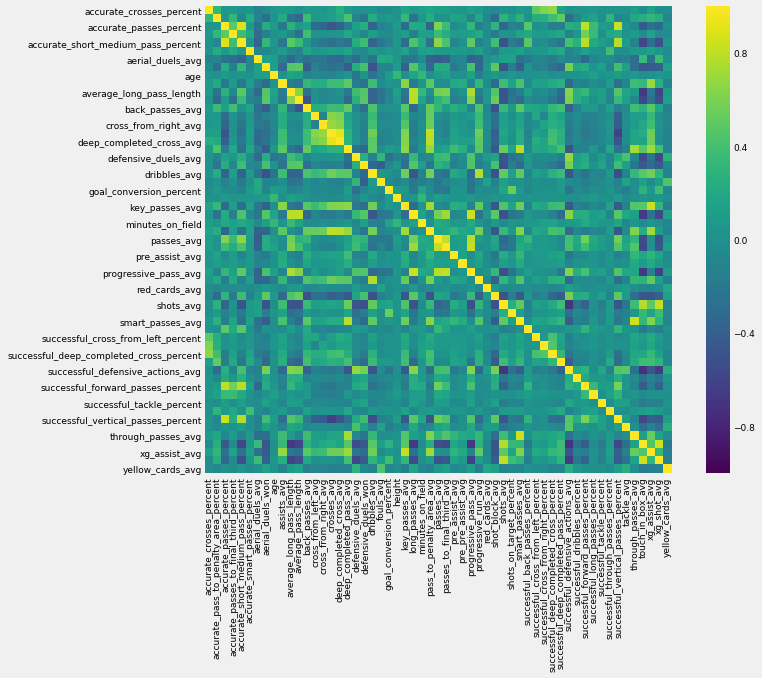

In [334]:
sns.heatmap(jugadores_numeric2.corr(), square=True, cmap='viridis', vmin=-1, vmax=1);

Quitar: 
'accurate_short_medium_pass_percent', 'through_passes_avg'

In [446]:
# función que arroja todos los pares de variables con correlación mayor a 8
corr_matrix = jugadores_numeric2.corr().reset_index()
corr = []
def high_corr(row):
    global corr
    for el in corr_matrix.columns[1:]:
        if row[el] > 0.8 and row[el] < 1:
            corr.append((el,row['index'], row[el]))

In [447]:
corr_matrix.apply(high_corr, axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
56    None
dtype: object

In [448]:
corr

[('accurate_short_medium_pass_percent',
  'accurate_passes_percent',
  0.8980520228795889),
 ('successful_forward_passes_percent',
  'accurate_passes_percent',
  0.8002871403582047),
 ('successful_vertical_passes_percent',
  'accurate_passes_percent',
  0.8402258671136507),
 ('accurate_passes_percent',
  'accurate_short_medium_pass_percent',
  0.8980520228795889),
 ('deep_completed_cross_avg', 'crosses_avg', 0.9205464422541493),
 ('pass_to_penalty_area_avg', 'crosses_avg', 0.8062916858546144),
 ('crosses_avg', 'deep_completed_cross_avg', 0.9205464422541493),
 ('xg_assist_avg', 'key_passes_avg', 0.8260877700544145),
 ('progressive_pass_avg', 'long_passes_avg', 0.8370037859354937),
 ('crosses_avg', 'pass_to_penalty_area_avg', 0.8062916858546144),
 ('passes_to_final_third_avg', 'passes_avg', 0.817502485082517),
 ('passes_avg', 'passes_to_final_third_avg', 0.817502485082517),
 ('progressive_pass_avg', 'passes_to_final_third_avg', 0.8152877740906246),
 ('long_passes_avg', 'progressive_pass_

In [449]:
jugadores_3 = jugadores_2.drop(columns=['accurate_short_medium_pass_percent', 'through_passes_avg'])

In [450]:
jugadores_3.shape

(8070, 69)

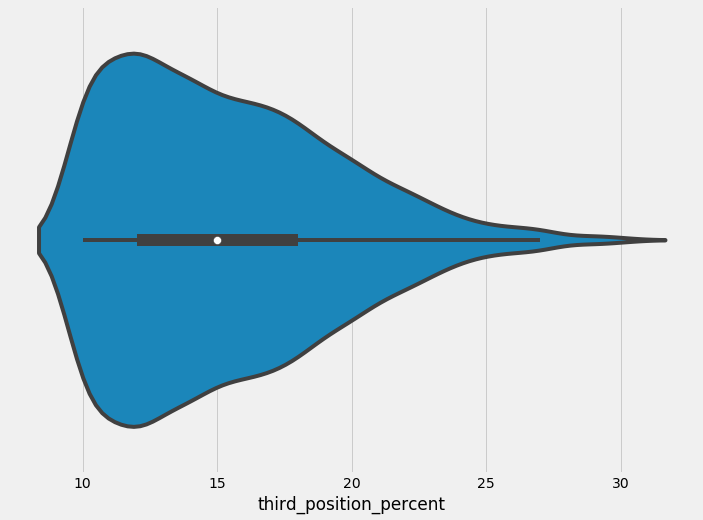

In [451]:
# Agregar una columna de versatilidad
sns.violinplot('third_position_percent', data=jugadores_3[jugadores_3['third_position_percent'] != 0]);

In [452]:
# si un jugador tiene un porcentaje de minutos jugados en una tercera posición mayor a la media, podemos afirmar
#con más seguridad que es versátil.
def versatility(x):
    if x >= 15:
        return 3
    elif x > 0 and x < 15:
        return 2
    return 1
jugadores_3['Versatilidad'] = jugadores_3['third_position_percent'].apply(versatility)

In [453]:
jugadores_3['primary_position'].unique()

array(['LAMF', 'LCMF3', 'CF', 'LW', 'RCMF', 'AMF', 'LCMF', 'RW', 'LDMF',
       'LCB', 'RDMF', 'RWF', 'RAMF', 'RB', 'LB', 'RCB', 'RCMF3', 'LWF',
       'DMF', 'RWB', 'LWB', 'CB', 'RCB3', 'LCB3', 'RB5', 'LB5', 'GK'],
      dtype=object)

In [454]:
len(jugadores_3['secondary_position'].unique()) == len(jugadores_3['third_position'].unique())

True

In [455]:
def position_raw(x):
    if x == 'CF' or x == 'LW' or x=='RW' or x=='LWF' or x=='RWF' or x=='AMF':
        return 3
    elif x == 'LDMF' or x=='RDMF' or x=='CM' or x=='DMF' or x=='LCMF' or x=='RCMF' or x=='LAMF' or x=='RAMF' or x=='RCMF3' or x=='LCMF3' or x=='RAMF':
        return 2
    return 1
jugadores_3['Posición'] = jugadores['primary_position'].apply(position_raw)


In [456]:
jugadores_3.shape

(8070, 71)

In [457]:
# Exploración del Dataset
jugadores_3.head()

,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,assists_avg,average_long_pass_length,...,tackle_avg,third_position,third_position_percent,touch_in_box_avg,weight,xg_assist_avg,xg_shot_avg,yellow_cards_avg,Versatilidad,Posición
0,28.5700,59.8300,83.3800,81.7500,34.0000,1.2300,25.8100,23,0.0600,25.5500,...,0.0800,NaN,0,3.1700,72,0.0700,0.3000,0.1000,1,2
1,22.6200,59.0900,82.0200,76.7400,57.8900,2.0500,22.7300,18,0.0600,29.1900,...,0.1200,RAMF,18,3.5700,64,0.1200,0.2100,0.1600,3,2
2,24.2400,45.9000,83.1300,78.1900,28.5700,4.3300,41.1300,22,0.0700,25.9000,...,0.3100,LCMF,14,2.3000,72,0.0700,0.1500,0.3800,2,2
3,23.2600,57.1400,82.3000,77.4000,43.0800,2.7300,36.6700,20,0.0900,36.0300,...,1.2100,RCMF,12,1.1500,73,0.0800,0.1100,0.0900,2,2
4,52.9400,56.2500,79.7000,78.2600,37.5000,4.4500,38.6000,17,0.1600,15.2000,...,0.1600,NaN,0,5.1600,70,0.1600,0.4700,0.0800,1,3


In [458]:
jugadores_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 71 columns):
accurate_crosses_percent                   5869 non-null float64
accurate_pass_to_penalty_area_percent      5869 non-null float64
accurate_passes_percent                    5869 non-null float64
accurate_passes_to_final_third_percent     5869 non-null float64
accurate_smart_passes_percent              5869 non-null float64
aerial_duels_avg                           5869 non-null float64
aerial_duels_won                           5869 non-null float64
age                                        8070 non-null int64
assists_avg                                5869 non-null float64
average_long_pass_length                   8070 non-null float64
average_pass_length                        8070 non-null float64
back_passes_avg                            5869 non-null float64
birth_country_name                         8070 non-null object
cross_from_left_avg                        5869 non

In [459]:
jugadores_3.describe().T

,count,mean,std,min,25%,50%,75%,max
accurate_crosses_percent,5869.0000,30.6154,20.4816,0.0000,20.0000,31.2500,40.0000,100.0000
accurate_pass_to_penalty_area_percent,5869.0000,45.6271,16.8909,0.0000,37.5000,47.6200,55.8800,100.0000
accurate_passes_percent,5869.0000,79.5018,6.4673,52.3800,75.1500,79.8200,84.2700,93.6100
accurate_passes_to_final_third_percent,5869.0000,68.3751,10.5389,0.0000,61.9000,69.2300,75.5500,100.0000
accurate_smart_passes_percent,5869.0000,36.4959,26.1081,0.0000,20.0000,37.5000,50.0000,100.0000
aerial_duels_avg,5869.0000,3.8135,2.4535,0.0000,2.1500,3.2100,4.7700,22.4500
aerial_duels_won,5869.0000,42.0338,14.2727,0.0000,31.9100,42.6700,52.7800,100.0000
age,8070.0000,25.9515,4.9826,15.0000,22.0000,26.0000,29.0000,46.0000
assists_avg,5869.0000,0.0677,0.0880,0.0000,0.0000,0.0400,0.1100,0.8500
average_long_pass_length,8070.0000,26.9248,12.4600,0.0000,18.7300,30.0000,36.3475,71.0700


#### Remover outliers 
accurate_crosses_percent, accurate_pass_to_penalty_area_percent, accurate_passes_to_final_third_percent, accurate_smart_passes_percent, aerial_duels_won, goal_conversion_percent, shots_on_target_percent, successful_back_passes_percent, successful_cross_from_left_percent, successful_cross_from_right_percent, successful_deep_completed_cross_percent, successful_deep_completed_pass_percent, successful_dribbles_percent, successful_forward_passes_percent, successful_long_passes_percent, successful_tackle_percent, successful_through_passes_percent, successful_vertical_passes_percent

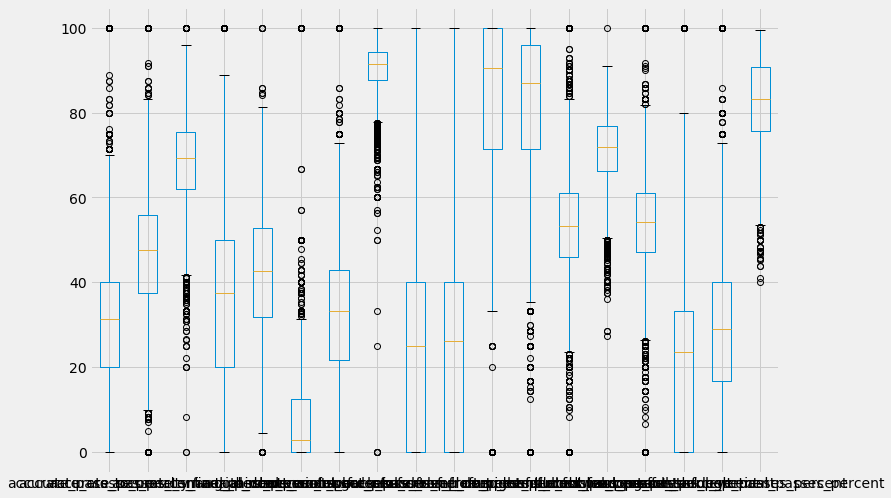

In [460]:
jugadores_3.boxplot(column=['accurate_crosses_percent', 'accurate_pass_to_penalty_area_percent',
                           'accurate_passes_to_final_third_percent', 'accurate_smart_passes_percent', 'aerial_duels_won',
                            'goal_conversion_percent', 'shots_on_target_percent', 'successful_back_passes_percent',
                            'successful_cross_from_left_percent', 'successful_cross_from_right_percent',
                            'successful_deep_completed_cross_percent', 'successful_deep_completed_pass_percent',
                            'successful_dribbles_percent', 'successful_forward_passes_percent',
                            'successful_long_passes_percent', 'successful_tackle_percent', 'successful_through_passes_percent',
                            'successful_vertical_passes_percent'])

upper_fence = 99 
lower_fence = 1 

jugadores_4 = jugadores_3[(jugadores_3['accurate_crosses_percent'] <= upper_fence) &
                          (jugadores_3['accurate_crosses_percent'] >= lower_fence) &
                          (jugadores_3['accurate_pass_to_penalty_area_percent'] <= upper_fence) &
                          (jugadores_3['accurate_pass_to_penalty_area_percent'] >= lower_fence) &
                          (jugadores_3['accurate_passes_to_final_third_percent'] <= upper_fence) &
                          (jugadores_3['accurate_passes_to_final_third_percent'] >= lower_fence) &
                          (jugadores_3['accurate_smart_passes_percent'] <= upper_fence) &
                          (jugadores_3['accurate_smart_passes_percent'] >= lower_fence) &
                          (jugadores_3['aerial_duels_won'] <= upper_fence) &
                          (jugadores_3['aerial_duels_won'] >= lower_fence) &
                          (jugadores_3['goal_conversion_percent'] <= upper_fence) &
                          (jugadores_3['goal_conversion_percent'] >= lower_fence) &
                          (jugadores_3['shots_on_target_percent'] <= upper_fence) &
                          (jugadores_3['shots_on_target_percent'] >= lower_fence) & 
                          (jugadores_3['successful_back_passes_percent'] <= upper_fence) &
                          (jugadores_3['successful_back_passes_percent'] >= lower_fence) &
                          (jugadores_3['successful_cross_from_left_percent'] <= upper_fence) &
                          (jugadores_3['successful_cross_from_left_percent'] >= lower_fence) &
                          (jugadores_3['successful_cross_from_right_percent'] <= upper_fence) &
                          (jugadores_3['successful_deep_completed_cross_percent'] >= lower_fence) &
                          (jugadores_3['successful_deep_completed_cross_percent'] <= upper_fence) &
                          (jugadores_3['successful_deep_completed_pass_percent'] >= lower_fence) & 
                          (jugadores_3['successful_deep_completed_pass_percent'] <= upper_fence) &
                          (jugadores_3['successful_dribbles_percent'] >= lower_fence) &
                          (jugadores_3['successful_dribbles_percent'] <= upper_fence) &
                          (jugadores_3['successful_forward_passes_percent'] >= lower_fence) &
                          (jugadores_3['successful_forward_passes_percent'] <= upper_fence) &
                          (jugadores_3['successful_long_passes_percent'] >= lower_fence) &
                          (jugadores_3['successful_long_passes_percent'] <= upper_fence) &
                          (jugadores_3['successful_tackle_percent'] >= lower_fence) &
                          (jugadores_3['successful_tackle_percent'] <= upper_fence) &
                          (jugadores_3['successful_through_passes_percent'] >= lower_fence) &
                          (jugadores_3['successful_through_passes_percent'] <= upper_fence) &
                          (jugadores_3['successful_vertical_passes_percent'] >= lower_fence) &
                          (jugadores_3['successful_vertical_passes_percent'] <= upper_fence)]

In [461]:
names = ['accurate_crosses_percent', 'accurate_pass_to_penalty_area_percent',
                           'accurate_passes_to_final_third_percent', 'accurate_smart_passes_percent', 'aerial_duels_won',
                            'goal_conversion_percent', 'shots_on_target_percent', 'successful_back_passes_percent',
                            'successful_cross_from_left_percent', 'successful_cross_from_right_percent',
                            'successful_deep_completed_cross_percent', 'successful_deep_completed_pass_percent',
                            'successful_dribbles_percent', 'successful_forward_passes_percent',
                            'successful_long_passes_percent', 'successful_tackle_percent', 'successful_through_passes_percent',
                            'successful_vertical_passes_percent']

In [462]:
for n in names:
    print(n,':',sum(jugadores_3[n]<100))

accurate_crosses_percent : 5711
accurate_pass_to_penalty_area_percent : 5811
accurate_passes_to_final_third_percent : 5851
accurate_smart_passes_percent : 5559
aerial_duels_won : 5865
goal_conversion_percent : 8024
shots_on_target_percent : 5808
successful_back_passes_percent : 5646
successful_cross_from_left_percent : 5570
successful_cross_from_right_percent : 5600
successful_deep_completed_cross_percent : 3542
successful_deep_completed_pass_percent : 4560
successful_dribbles_percent : 5699
successful_forward_passes_percent : 5868
successful_long_passes_percent : 5799
successful_tackle_percent : 5728
successful_through_passes_percent : 5691
successful_vertical_passes_percent : 5869


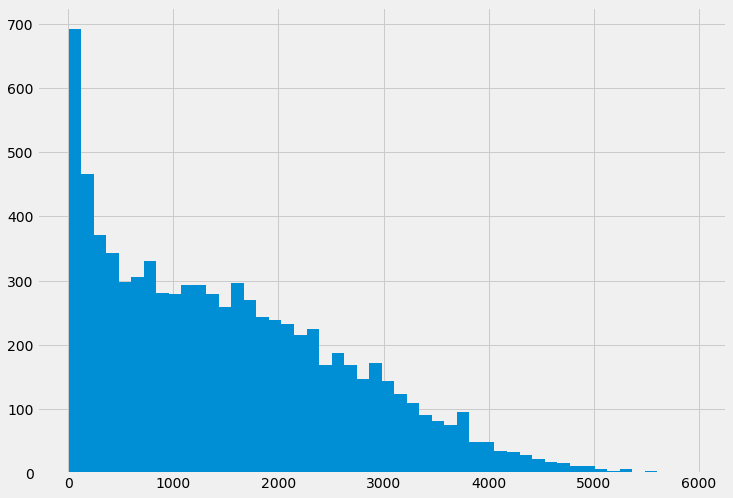

In [463]:
jugadores_3.minutes_on_field.hist(bins=50);

In [464]:
jugadores_4 = jugadores_3[(jugadores_3['minutes_on_field'] >= 280)]
jugadores_4.shape

(6808, 71)

In [465]:
jugadores_4.describe().T

,count,mean,std,min,25%,50%,75%,max
accurate_crosses_percent,5869.0000,30.6154,20.4816,0.0000,20.0000,31.2500,40.0000,100.0000
accurate_pass_to_penalty_area_percent,5869.0000,45.6271,16.8909,0.0000,37.5000,47.6200,55.8800,100.0000
accurate_passes_percent,5869.0000,79.5018,6.4673,52.3800,75.1500,79.8200,84.2700,93.6100
accurate_passes_to_final_third_percent,5869.0000,68.3751,10.5389,0.0000,61.9000,69.2300,75.5500,100.0000
accurate_smart_passes_percent,5869.0000,36.4959,26.1081,0.0000,20.0000,37.5000,50.0000,100.0000
aerial_duels_avg,5869.0000,3.8135,2.4535,0.0000,2.1500,3.2100,4.7700,22.4500
aerial_duels_won,5869.0000,42.0338,14.2727,0.0000,31.9100,42.6700,52.7800,100.0000
age,6808.0000,26.5574,4.8154,15.0000,23.0000,26.0000,30.0000,46.0000
assists_avg,5869.0000,0.0677,0.0880,0.0000,0.0000,0.0400,0.1100,0.8500
average_long_pass_length,6808.0000,28.4312,10.7646,0.0000,21.2100,31.1300,36.5700,56.9000


In [466]:
for n in names:
    print(n,':',sum(jugadores_4[n]<100))

accurate_crosses_percent : 5711
accurate_pass_to_penalty_area_percent : 5811
accurate_passes_to_final_third_percent : 5851
accurate_smart_passes_percent : 5559
aerial_duels_won : 5865
goal_conversion_percent : 6785
shots_on_target_percent : 5808
successful_back_passes_percent : 5646
successful_cross_from_left_percent : 5570
successful_cross_from_right_percent : 5600
successful_deep_completed_cross_percent : 3542
successful_deep_completed_pass_percent : 4560
successful_dribbles_percent : 5699
successful_forward_passes_percent : 5868
successful_long_passes_percent : 5799
successful_tackle_percent : 5728
successful_through_passes_percent : 5691
successful_vertical_passes_percent : 5869


In [467]:
jugadores_5 = jugadores_4[(jugadores_4['accurate_passes_to_final_third_percent'] < 100) &
                          (jugadores_4['accurate_passes_to_final_third_percent'] > 1)]

In [468]:
jugadores_5.shape

(5849, 71)

In [469]:
jugadores_5.describe().T

,count,mean,std,min,25%,50%,75%,max
accurate_crosses_percent,5849.0000,30.6333,20.4851,0.0000,20.0000,31.3300,40.0000,100.0000
accurate_pass_to_penalty_area_percent,5849.0000,45.6206,16.8653,0.0000,37.5000,47.6200,55.8800,100.0000
accurate_passes_percent,5849.0000,79.5005,6.4694,52.3800,75.1500,79.8200,84.2700,93.6100
accurate_passes_to_final_third_percent,5849.0000,68.3011,10.3328,8.3300,61.9000,69.2300,75.4900,96.0000
accurate_smart_passes_percent,5849.0000,36.4751,26.0788,0.0000,20.0000,37.5000,50.0000,100.0000
aerial_duels_avg,5849.0000,3.8101,2.4496,0.0000,2.1500,3.2000,4.7700,22.4500
aerial_duels_won,5849.0000,42.0696,14.2616,0.0000,31.9100,42.7600,52.7800,100.0000
age,5849.0000,26.7423,4.7254,15.0000,23.0000,26.0000,30.0000,46.0000
assists_avg,5849.0000,0.0675,0.0878,0.0000,0.0000,0.0400,0.1100,0.8500
average_long_pass_length,5849.0000,28.9982,10.0507,0.0000,22.2700,31.6100,36.6500,51.8900


In [470]:
jugadores_6 = jugadores_5[jugadores_5['goal_conversion_percent'] < 100]

In [471]:
jugadores_6.shape

(5836, 71)

In [472]:
jugadores_7 = jugadores_6[jugadores_6['successful_dribbles_percent'] < 100]
jugadores_7.shape

(5672, 71)

In [473]:
jugadores_8 = jugadores_7[(jugadores_7['successful_long_passes_percent'] < 100) & (jugadores_7['successful_tackle_percent'] < 100) & (jugadores_7['successful_through_passes_percent'] < 100) & (jugadores_7['shots_on_target_percent'] < 100) & (jugadores_7['accurate_smart_passes_percent'] < 100) & (jugadores_7['aerial_duels_won'] < 100)]

In [474]:
jugadores_8.shape

(5093, 71)

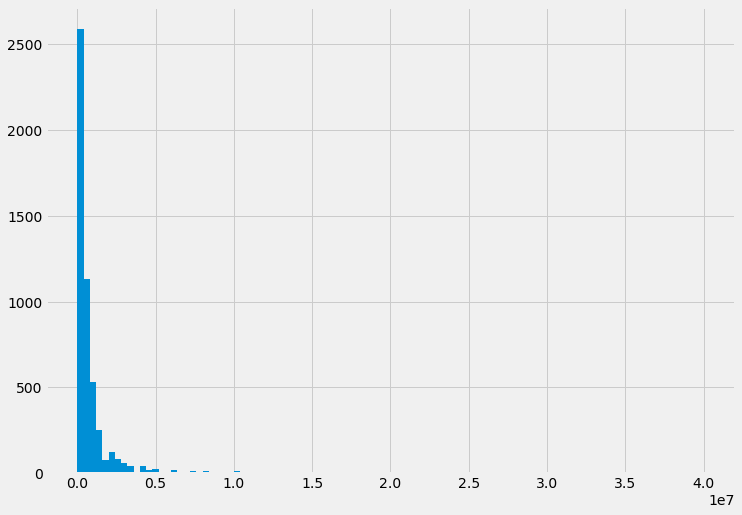

In [475]:
jugadores_8.market_value.hist(bins=100);

In [477]:
jugadores_8.market_value = jugadores_8.market_value.replace({0:20000})

In [478]:
jugadores_8.market_value

0       40000000
1       40000000
2       35000000
3       20000000
4       20000000
5       20000000
6       18000000
7       18000000
9       17500000
10      17000000
11      15000000
12      15000000
13      15000000
14      15000000
15      15000000
16      15000000
17      15000000
18      14000000
19      14000000
20      13000000
21      13000000
22      13000000
23      12500000
24      12500000
25      12500000
26      12500000
27      12000000
28      11000000
29      10000000
30      10000000
          ...   
8002       20000
8003       20000
8004       20000
8008       20000
8009       20000
8010       20000
8012       20000
8019       20000
8020       20000
8021       20000
8022       20000
8024       20000
8025       20000
8028       20000
8033       20000
8034       20000
8035       20000
8037       20000
8038       20000
8043       20000
8044       20000
8045       20000
8049       20000
8052       20000
8058       20000
8059       20000
8065       20000
8066       200

Habría que explorar la probabilidad de crear nuevas variables compuestas: accurate_passtopenaltyarea_and_finalthird o algo así (1. ML)

In [479]:
dict(jugadores_8.isnull().sum(axis = 0))

{'accurate_crosses_percent': 0,
 'accurate_pass_to_penalty_area_percent': 0,
 'accurate_passes_percent': 0,
 'accurate_passes_to_final_third_percent': 0,
 'accurate_smart_passes_percent': 0,
 'aerial_duels_avg': 0,
 'aerial_duels_won': 0,
 'age': 0,
 'assists_avg': 0,
 'average_long_pass_length': 0,
 'average_pass_length': 0,
 'back_passes_avg': 0,
 'birth_country_name': 0,
 'cross_from_left_avg': 0,
 'cross_from_right_avg': 0,
 'crosses_avg': 0,
 'current_team_name': 134,
 'deep_completed_cross_avg': 0,
 'deep_completed_pass_avg': 0,
 'defensive_duels_avg': 0,
 'defensive_duels_won': 0,
 'domestic_competition_name': 160,
 'dribbles_avg': 0,
 'foot': 508,
 'fouls_avg': 0,
 'full_name': 0,
 'goal_conversion_percent': 0,
 'height': 0,
 'id': 0,
 'key_passes_avg': 0,
 'long_passes_avg': 0,
 'market_value': 0,
 'minutes_on_field': 0,
 'pass_to_penalty_area_avg': 0,
 'passes_avg': 0,
 'passes_to_final_third_avg': 0,
 'pre_assist_avg': 0,
 'pre_pre_assist_avg': 0,
 'primary_position': 0,
 'p

Secondary Position - rellenarlos con 'None', lo mismo con 'third_position', 
'domestic_competition_name': 160 - Eliminarlos
'current_team_name': 134 - Eliminarlos 
'foot': 508 - rellenarlos con 'Desconocido'

En el dataset hay jugadores del Real Madrid (Primera División), Serie A, Premier League, Bundesliga, Eredivise, Ligue 1 

In [480]:
dict(jugadores_8.domestic_competition_name.value_counts())
# se repite Primera División, pero una con tilde y otra sin, algunos hacen referencia a la primera división de El Salvador,
# otros de nicaragua, 

# con tilde hace referencia a la liga de venezuela, española, costarricense, chilena, uruguaya, 

{'Primera División': 1176,
 'Primera A': 625,
 'MLS': 477,
 'Superliga': 413,
 'Liga MX': 355,
 'LFPB': 266,
 'Division Profesional': 230,
 'Serie A': 224,
 'Prim B Nacional': 84,
 'Serie B': 76,
 'Primera B': 65,
 'LPF': 62,
 'Serie D': 59,
 'Paranaense 1': 57,
 'USL Championship': 56,
 'Ascenso MX': 54,
 'Catarinense 1': 54,
 'Segunda División': 48,
 'Pernambucano 1': 39,
 'Cearense 1': 38,
 'Copa do Nordeste': 38,
 'Supercopa': 38,
 'Goiano 1': 34,
 'Copa Sudamericana Play-Offs - Final': 33,
 'Serie C': 30,
 'Baiano 1': 23,
 'Primeira Liga': 21,
 'Paraense': 20,
 'Potiguar': 18,
 'Maranhense': 16,
 'Liga de Ascenso': 15,
 'USL League 1': 12,
 'Liga Nacional': 9,
 'Super League': 8,
 'K League 2': 7,
 'Copa Federacion SUB 18': 6,
 'Division Intermedia': 5,
 'Premier League': 5,
 'U20 League': 5,
 'Primera Division': 5,
 'Segunda Liga': 4,
 'Segunda B': 4,
 'Eredivisie': 4,
 'Reserve League': 4,
 "Ligat ha'Al": 4,
 'Premyer Liqa': 4,
 'Paulista A2': 4,
 'Süper Lig': 4,
 'Arabian Gulf 

In [481]:
print(jugadores_8.foot.value_counts())
print('__________________________________________________')
jugadores_8.foot.value_counts().values.sum()

right    3393
left     1154
both       38
Name: foot, dtype: int64
__________________________________________________


4585

In [482]:
jugadores_9 = jugadores_8.dropna(subset = ['domestic_competition_name', 'current_team_name'])

In [483]:
jugadores_9.shape

(4933, 71)

In [485]:
jugadores_9[['secondary_position', 'third_position']] = jugadores_9[['secondary_position', 'third_position']].fillna(value='None')

In [486]:
jugadores_9.third_position.value_counts()

None     2801
LCMF      207
RCMF      176
RW        172
LW        161
LAMF      152
AMF       129
LDMF      122
RDMF      117
RAMF      113
CF        109
DMF       104
LCMF3      99
RCMF3      87
LWF        56
RB         47
RWF        47
LB         39
CB         38
LCB3       28
RCB3       25
RCB        23
LCB        23
LWB        19
RWB        18
RB5        12
LB5         9
Name: third_position, dtype: int64

In [489]:
jugadores_9['foot'] = jugadores_9['foot'].fillna(value='Desconocido')
jugadores_9.foot.value_counts()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


right          3290
left           1120
Desconocido     489
both             34
Name: foot, dtype: int64

In [490]:
# Checamos nuevamente a ser si se nos escapó un nulo: 
jugadores_9.isnull().sum(axis = 0) == 0

accurate_crosses_percent                   True
accurate_pass_to_penalty_area_percent      True
accurate_passes_percent                    True
accurate_passes_to_final_third_percent     True
accurate_smart_passes_percent              True
aerial_duels_avg                           True
aerial_duels_won                           True
age                                        True
assists_avg                                True
average_long_pass_length                   True
average_pass_length                        True
back_passes_avg                            True
birth_country_name                         True
cross_from_left_avg                        True
cross_from_right_avg                       True
crosses_avg                                True
current_team_name                          True
deep_completed_cross_avg                   True
deep_completed_pass_avg                    True
defensive_duels_avg                        True
defensive_duels_won                     

In [530]:
# Variables dummy para la posición - no se crearán para versatilidad pues la columna ordinal hace sentido... 
# Hacer get_dummies de una columna y luego concatenarlas (1. ML)

# Drop First True para evitar la colinealidad... 

jugadores_10 = pd.get_dummies(jugadores_9, columns=['Posición'], drop_first=True)
jugadores_10.shape

(4933, 72)

In [531]:
jugadores_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933 entries, 0 to 8069
Data columns (total 72 columns):
accurate_crosses_percent                   4933 non-null float64
accurate_pass_to_penalty_area_percent      4933 non-null float64
accurate_passes_percent                    4933 non-null float64
accurate_passes_to_final_third_percent     4933 non-null float64
accurate_smart_passes_percent              4933 non-null float64
aerial_duels_avg                           4933 non-null float64
aerial_duels_won                           4933 non-null float64
age                                        4933 non-null int64
assists_avg                                4933 non-null float64
average_long_pass_length                   4933 non-null float64
average_pass_length                        4933 non-null float64
back_passes_avg                            4933 non-null float64
birth_country_name                         4933 non-null object
cross_from_left_avg                        4933 non

In [532]:
jugadores_10 = jugadores_10.drop(columns=['id'])
jugadores_10.shape

(4933, 71)

In [533]:
jugadores_10.age.value_counts()

26    385
27    367
25    366
23    358
22    348
28    341
29    337
24    332
30    295
21    262
31    251
20    230
33    208
32    202
34    181
19    139
35    106
18     67
36     47
37     46
38     26
39     16
17     11
40      5
41      3
15      3
16      1
Name: age, dtype: int64

In [534]:
# vamos a remover a los jugadores menores de 16 años y a los mayores de 39 
jugadores_11 = jugadores_10[(jugadores_10['age'] > 16) & (jugadores_10['age'] < 39)]

In [535]:
jugadores_11.Versatilidad.value_counts()

1    2787
2    1113
3    1005
Name: Versatilidad, dtype: int64

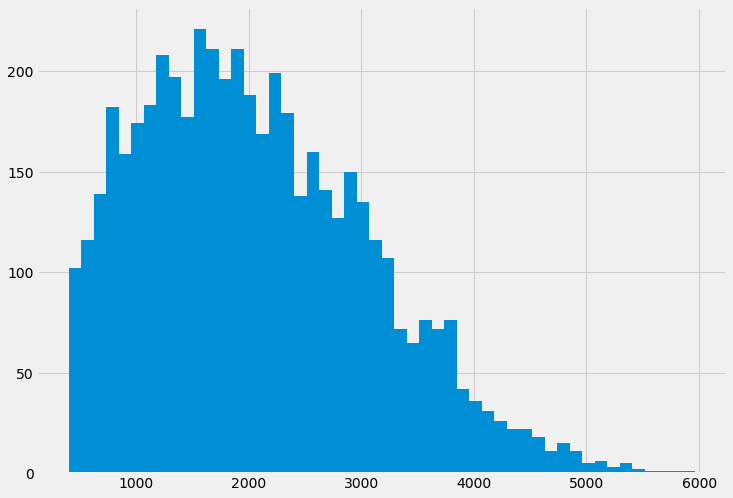

In [497]:
# Categorizar el valor de mercado - qcut (1. ML) - esto nos puede servir para explorar si algunas variables están 
# relacionadas con las categorías del valor de mercado...
# Lo mismo para los minutos en el campo
jugadores_11.minutes_on_field.hist(bins=50)

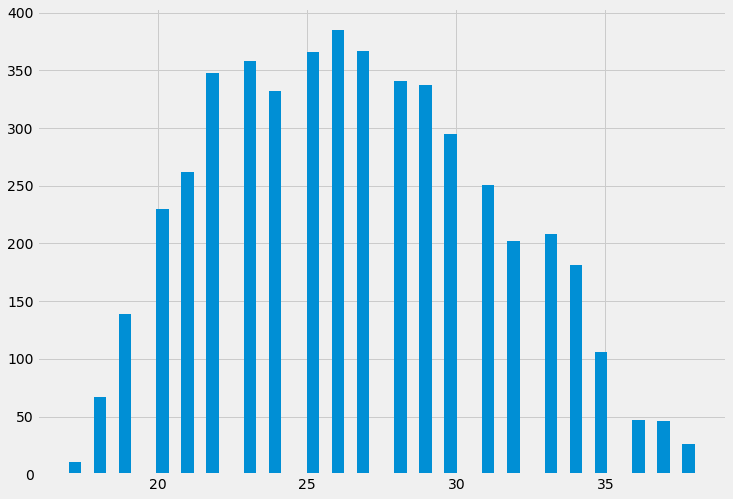

In [498]:
jugadores_11.age.hist(bins=50);

In [536]:
# Son demasiados con menos de 10, quizá, a partir de Ghana habría que categorizarlos como 'otro' y crear otra columna...
# y me parece que lo mismo habría que hacer para las ligas...
jugadores_11.birth_country_name.value_counts()[:20]

Argentina     792
Brazil        756
Colombia      526
Venezuela     328
Uruguay       322
Paraguay      289
Peru          254
Ecuador       235
USA           221
Mexico        220
Costa Rica    216
Chile         214
Bolivia       185
Panama         78
Canada         29
France         23
Spain          23
Honduras       17
England        13
Germany        12
Name: birth_country_name, dtype: int64

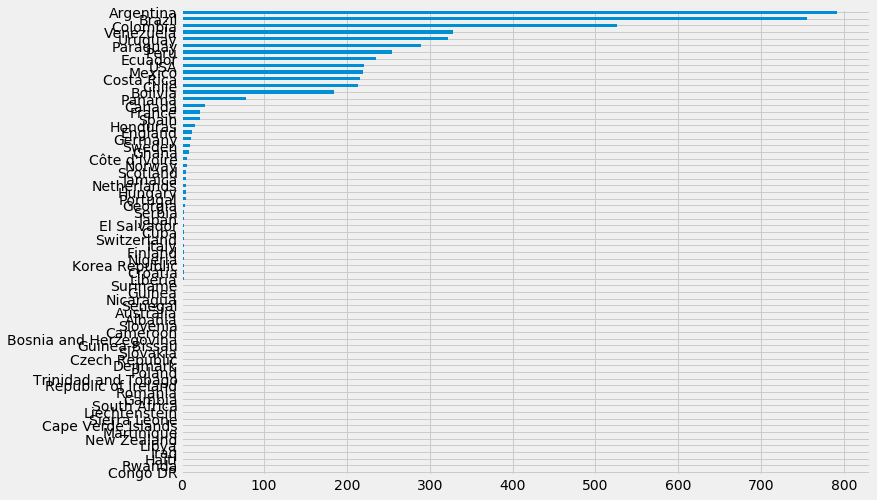

In [502]:
jugadores_11.birth_country_name.value_counts(ascending=True).plot(kind='barh');

In [538]:
# el siguiente código produce una lista de los países en el top 20.
top20_countries = jugadores_11.birth_country_name.value_counts()[:20].index.tolist()
# el siguiente código asigna el nombre 'OTHER' a todos los países que no estén en la lista previamente definida
jugadores_11.birth_country_name = jugadores_11.birth_country_name.apply(lambda country: country if country in top20_countries else 'Otro')

In [391]:
#for player in len(jugadores_11):
    #if jugadores_11['birth_country_name'][player] == 'Argentina' and jugadores_11['domestic_competition_name'][player] != 

# Estaría genial hacer una columna de si es extranjero (en la liga que está jugando o no)...  
# if birth_country_name = Brasil and competition_name != 'Liga Brasiñeña'...

# se repite Primera División, pero una con tilde y otra sin, algunos hacen referencia a la primera división de El Salvador,
# otros de nicaragua, 

# con tilde hace referencia a la liga de venezuela, española, costarricense, chilena, uruguaya, 

In [539]:
# hacer un df de los jugadores más caros y comparar con un describe si hay mucha diferencia en las métricas de sus variables

expensive_players = jugadores_11[jugadores_11.market_value > 6000000]
regular_players = jugadores_11[jugadores_11.market_value <= 6000000]

In [505]:
expensive_players.describe().T

,count,mean,std,min,25%,50%,75%,max
accurate_crosses_percent,75.0000,29.9292,10.4231,0.0000,23.7150,29.5800,35.1450,52.9400
accurate_pass_to_penalty_area_percent,75.0000,54.1240,9.1251,23.0800,48.2400,55.1400,59.7750,73.9100
accurate_passes_percent,75.0000,80.9015,6.0626,68.3000,76.7100,82.0200,85.1400,93.2500
accurate_passes_to_final_third_percent,75.0000,74.2497,8.1851,52.6300,69.8550,75.6800,79.3000,89.9000
accurate_smart_passes_percent,75.0000,40.8569,13.4285,0.0000,34.3100,42.1100,47.7250,80.0000
aerial_duels_avg,75.0000,2.9380,1.7721,0.3300,1.8800,2.4800,3.9200,9.7400
aerial_duels_won,75.0000,35.0637,11.9768,5.8800,27.3600,34.4500,43.7300,63.1600
age,75.0000,23.5200,3.6811,17.0000,21.0000,23.0000,26.0000,31.0000
assists_avg,75.0000,0.1137,0.0839,0.0000,0.0500,0.1100,0.1700,0.3700
average_long_pass_length,75.0000,28.6217,8.7047,4.8100,23.5700,29.1900,35.3800,42.5600


In [506]:
regular_players.describe().T

,count,mean,std,min,25%,50%,75%,max
accurate_crosses_percent,4830.0000,31.4928,19.2607,0.0000,22.2200,32.0000,40.0000,100.0000
accurate_pass_to_penalty_area_percent,4830.0000,45.9650,15.3361,0.0000,38.1000,47.8300,55.7650,100.0000
accurate_passes_percent,4830.0000,79.2755,6.4037,52.3800,74.9525,79.5900,84.0700,93.6100
accurate_passes_to_final_third_percent,4830.0000,68.4859,9.9238,20.0000,62.3500,69.5300,75.4100,96.0000
accurate_smart_passes_percent,4830.0000,34.4485,21.2934,0.0000,20.0000,36.8400,50.0000,88.8900
aerial_duels_avg,4830.0000,3.7423,2.4232,0.0000,2.1000,3.0850,4.7075,20.2500
aerial_duels_won,4830.0000,41.4969,13.9498,0.0000,31.7200,42.1100,52.0800,85.7100
age,4830.0000,26.6718,4.5747,17.0000,23.0000,26.0000,30.0000,38.0000
assists_avg,4830.0000,0.0722,0.0890,0.0000,0.0000,0.0500,0.1100,0.8500
average_long_pass_length,4830.0000,29.0142,9.7278,0.0000,22.3325,31.4550,36.4700,48.8600


#### Observaciones 

La diferencia de medias más significativa entre jugadores caros y regulares se da en las variables: 
'accurate_pass_to_penalty_area_percent', 'accurate_passes_to_final_third_percent', 'accurate_smart_passes_percent', 'passes_avg', 'height', 'minutes_on_field', 'shots_on_target_percent', 'successful_deep_completed_cross_percent', 'successful_deep_completed_pass_percent', 'successful_long_passes_percent', 'successful_through_passes_percent'. 

Cabe resaltar que la diferencia de medias en el rubro 'aerial_duels_won' es de -5.95. Esto podría explicarse ya que la mayoría de los jugadores que cuestan más de 6 millones de euros se desempeñan en posiciones 'creativas'/'ofensivas', en donde el rubro de duelos aéreos ganados quizás no tome tanta importancia. 

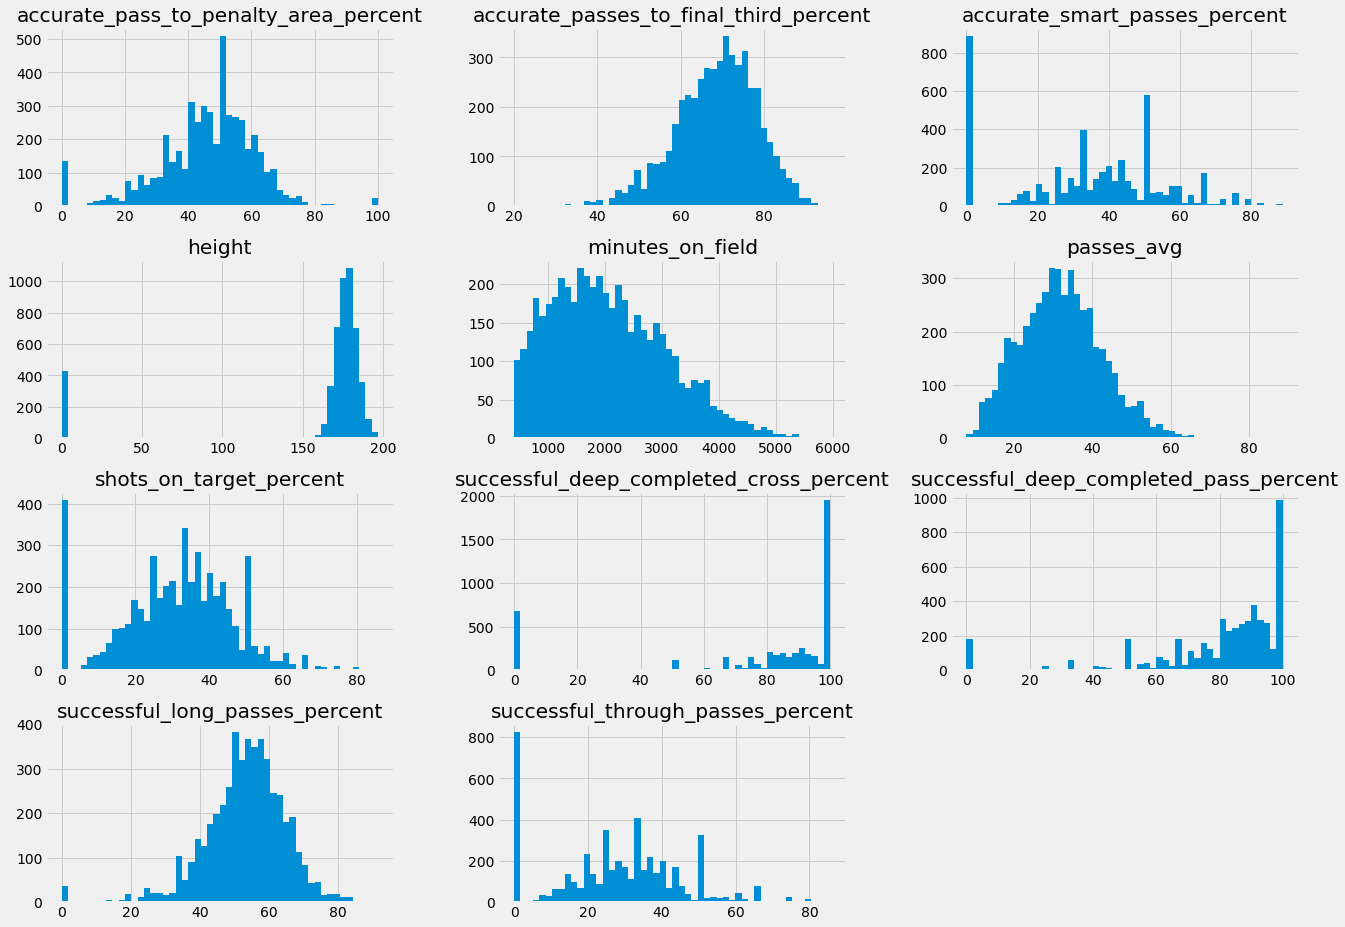

In [507]:
# plot a histogram for the numerical columns/features/attributes:

jugadores_11[['accurate_pass_to_penalty_area_percent',
              'accurate_passes_to_final_third_percent',
              'accurate_smart_passes_percent', 'passes_avg', 'height', 'minutes_on_field',
              'shots_on_target_percent', 'successful_deep_completed_cross_percent',
              'successful_deep_completed_pass_percent', 'successful_long_passes_percent',
              'successful_through_passes_percent']].hist(bins=50, figsize=(20,15))
plt.show();

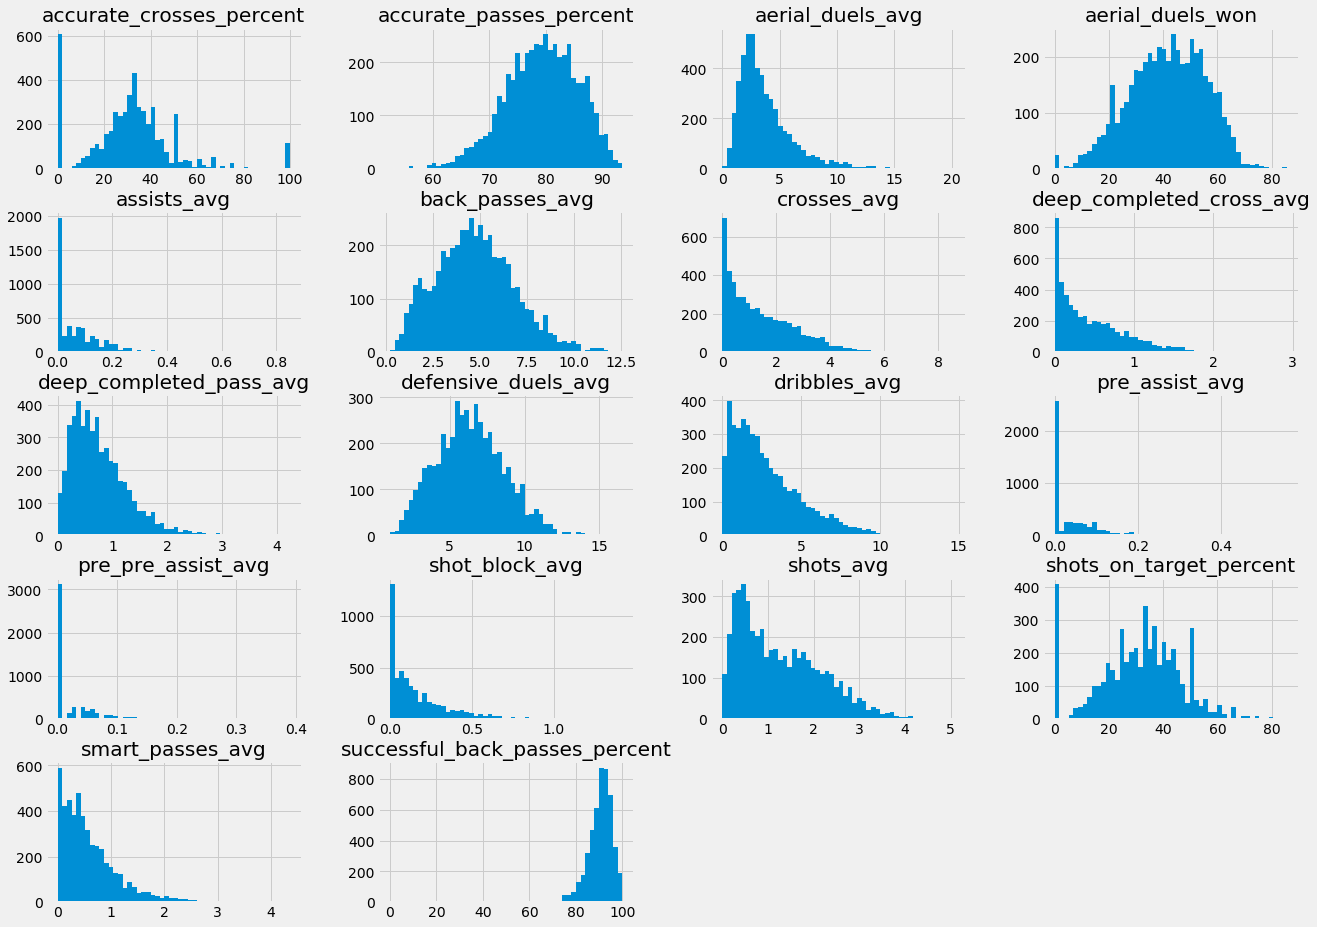

In [508]:
jugadores_11[['accurate_crosses_percent', 'crosses_avg', 'accurate_passes_percent', 'aerial_duels_avg', 'aerial_duels_won',
              'assists_avg', 'back_passes_avg', 'deep_completed_pass_avg',
              'defensive_duels_avg', 'dribbles_avg',
              'pre_assist_avg', 'pre_pre_assist_avg', 'shot_block_avg', 'shots_avg',
       'shots_on_target_percent', 'smart_passes_avg',
       'successful_back_passes_percent', 'deep_completed_cross_avg']].hist(bins=50, figsize=(20,15))
plt.show();   

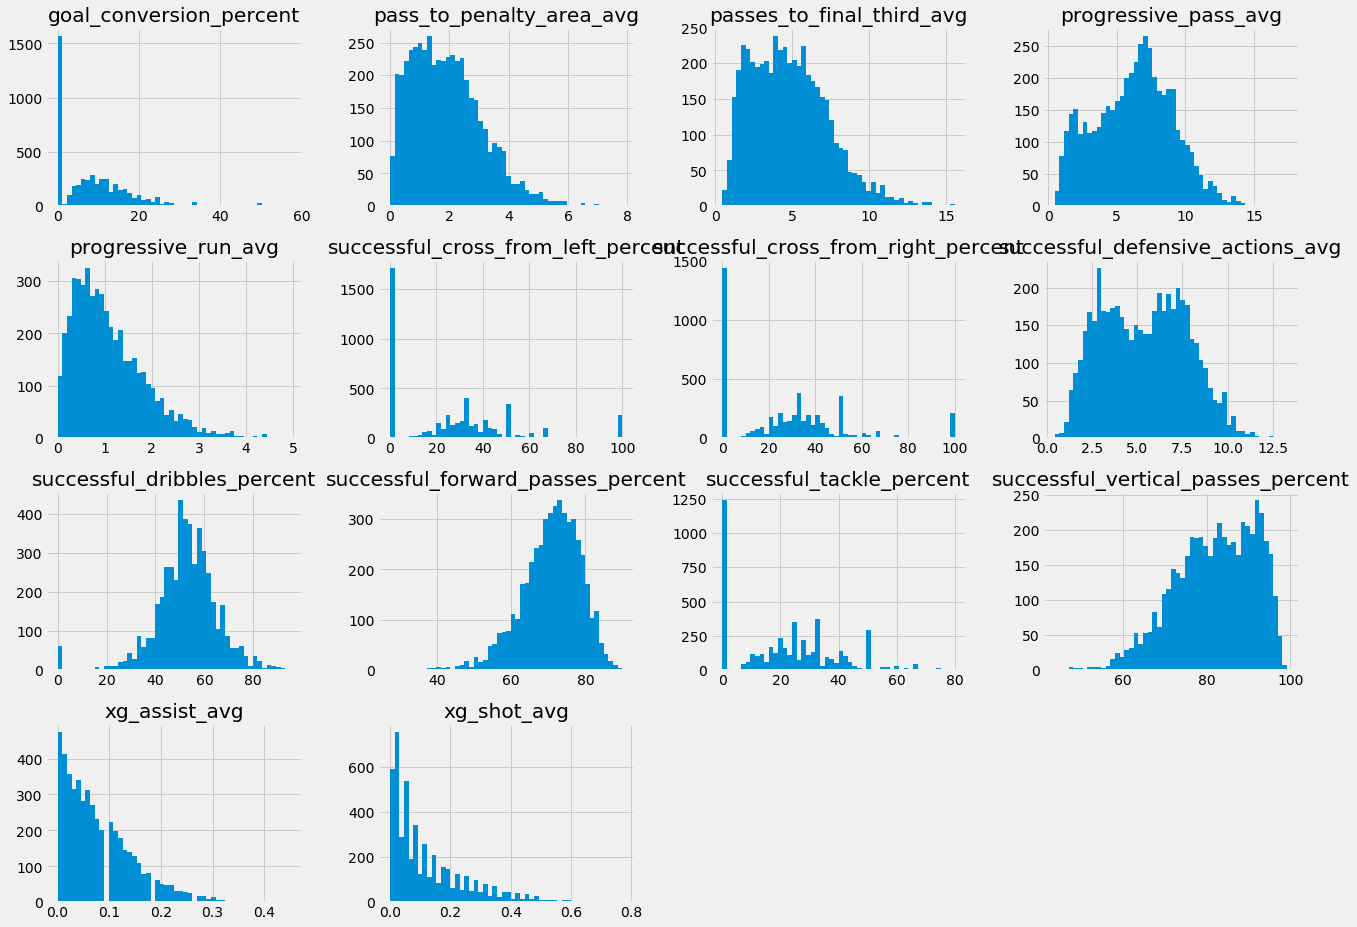

In [509]:
# checar por última vez variables correlacionadas/sesgadas 
jugadores_11[['goal_conversion_percent',
      'pass_to_penalty_area_avg',
    'passes_to_final_third_avg', 'progressive_pass_avg',
       'progressive_run_avg',   
    'successful_cross_from_left_percent',
       'successful_cross_from_right_percent',      
    'successful_defensive_actions_avg', 'successful_dribbles_percent',
       'successful_forward_passes_percent','successful_tackle_percent', 
        'successful_vertical_passes_percent', 'xg_assist_avg', 'xg_shot_avg']].hist(bins=50, figsize=(20,15))
plt.show();

#### Observaciones 
'successful_deep_completed_cross_percent' y 'successful_deep_completed_pass_percent' son dos porcentajes de efectividad que pueden llegar a verse sesgados so un jugador intentó muy pocos deep cosses o deep passes. Estas variables se derivan de 'deep_completed_cross_avg' y 'deep_completed_pass_avg'. Lo mismo ocurre con accurate_crosses_percent, que se deriva de 'crosses_avg'. 

Similarmente, ocurre el mismo sesgo con 'successful_cross_from_left_percent' y 'successful_cross_from_right_percent', que se derivan de 'cross_from_left_avg', 'cross_from_right_avg'.

La solución que emplearé es que si un jugador tiene un 'accurate_crosses_percent' de 100 (hay 114 de ellos) pero tiene un crosses_avg menor que el percentil 20 de dicha variable (.28), vamos a reemplazar ese 100 con 28.57, que es el valor del percentil 40 de 'accurate_crosses_percent'. 

De los 974 jugadores que tienen un 'successful_deep_completed_pass_percent' de 100. La media de sus 'deep_completed_pass_avg' es de .62 y el p20 de .25. Similarmente, a los jugadores que tengan un 'deep_completed_pass_avg' menor a .25, se les reemplazará su valor de 'successful_deep_completed_pass_percent' con 83.33 (que es el p40 de dicha variable). 

Respecto a 'successful_deep_completed_cross_percent' hay 1947 jugadores con 100 de efectividad. La media de 'deep_completed_cross_avg' es de .46, sin embargo la media de los jugadores con 100 de efectividad es de 0.33. A los jugadores que tengan un 'deep_completed_cross_avg' menor al p20 (0.07) se les reemplazará su valor de 'successful_deep_completed_cross_percent' con 86.67, correspondiente al p40. 

Existen 228 jugadores con 100 de 'successful_cross_from_left_percent' y 216 con 100 de 'successful_cross_from_right_percent'. En el primer rubro, aquellos que tengan un 'cross_from_left_avg' menor a 0.03 se les reemplazará su 100 por 19.454. En el segundo, si 'cross_from_right_avg' < 0.05 se les reemplazará por 21.908. 

In [540]:
jugadores_11.head()

,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,assists_avg,average_long_pass_length,...,third_position,third_position_percent,touch_in_box_avg,weight,xg_assist_avg,xg_shot_avg,yellow_cards_avg,Versatilidad,Posición_2,Posición_3
0,28.5700,59.8300,83.3800,81.7500,34.0000,1.2300,25.8100,23,0.0600,25.5500,...,None,0,3.1700,72,0.0700,0.3000,0.1000,1,1,0
1,22.6200,59.0900,82.0200,76.7400,57.8900,2.0500,22.7300,18,0.0600,29.1900,...,RAMF,18,3.5700,64,0.1200,0.2100,0.1600,3,1,0
2,24.2400,45.9000,83.1300,78.1900,28.5700,4.3300,41.1300,22,0.0700,25.9000,...,LCMF,14,2.3000,72,0.0700,0.1500,0.3800,2,1,0
3,23.2600,57.1400,82.3000,77.4000,43.0800,2.7300,36.6700,20,0.0900,36.0300,...,RCMF,12,1.1500,73,0.0800,0.1100,0.0900,2,1,0
4,52.9400,56.2500,79.7000,78.2600,37.5000,4.4500,38.6000,17,0.1600,15.2000,...,None,0,5.1600,70,0.1600,0.4700,0.0800,1,0,1


In [541]:
jugadores_11.loc[(jugadores_11["accurate_crosses_percent"] == 100) & (jugadores_11["crosses_avg"] < .28), "accurate_crosses_percent"] = 28.57
jugadores_11.loc[(jugadores_11["successful_deep_completed_pass_percent"] == 100) & (jugadores_11["deep_completed_pass_avg"] < .25), "successful_deep_completed_pass_percent"] = 83.33
jugadores_11.loc[(jugadores_11["successful_deep_completed_cross_percent"] == 100) & (jugadores_11["deep_completed_cross_avg"] < .07), "successful_deep_completed_cross_percent"] = 86.67
jugadores_11.loc[(jugadores_11["successful_cross_from_left_percent"] == 100) & (jugadores_11["cross_from_left_avg"] < .03), "successful_cross_from_left_percent"] = 19.454
jugadores_11.loc[(jugadores_11["successful_cross_from_right_percent"] == 100) & (jugadores_11["cross_from_right_avg"] < .05), "successful_cross_from_right_percent"] = 21.908

In [512]:
#jugadores_11.accurate_crosses_percent = jugadores_11[jugadores_11['crosses_avg'] < 0.28].replace({100:28.57}, inplace=True)
#jugadores_11[jugadores_11['deep_completed_pass_avg'] < 0.25]['successful_deep_completed_pass_percent'].replace({100:83.33}, inplace=True)
#jugadores_11[jugadores_11['deep_completed_cross_avg'] < 0.07]['successful_deep_completed_cross_percent'].replace({100:86.67}, inplace=True)

In [542]:
jugadores_11.tail()

,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,assists_avg,average_long_pass_length,...,third_position,third_position_percent,touch_in_box_avg,weight,xg_assist_avg,xg_shot_avg,yellow_cards_avg,Versatilidad,Posición_2,Posición_3
8059,31.9400,48.6500,83.2700,74.2600,38.4600,1.9000,23.4400,22,0.1200,29.9600,...,RCMF3,17,1.1300,64,0.1200,0.0800,0.2400,3,1,0
8065,34.3300,43.4000,77.3100,65.6600,36.3600,4.5300,62.4100,21,0.0600,33.5400,...,None,0,1.1600,77,0.0500,0.0700,0.1900,1,0,0
8066,22.2200,57.1400,77.4200,55.5600,66.6700,8.4400,39.4700,21,0.2200,16.9200,...,None,0,2.4400,0,0.1500,0.2800,0.4400,1,0,1
8067,26.0300,35.0600,85.3900,80.9400,31.5800,2.2100,32.1800,22,0.0300,32.1500,...,RCMF3,11,0.4600,72,0.0400,0.0300,0.3200,2,1,0
8069,18.1800,35.7100,74.3200,59.7400,33.3300,1.8200,21.7400,22,0.0000,29.8800,...,None,0,1.3500,70,0.1300,0.1800,0.0700,1,1,0


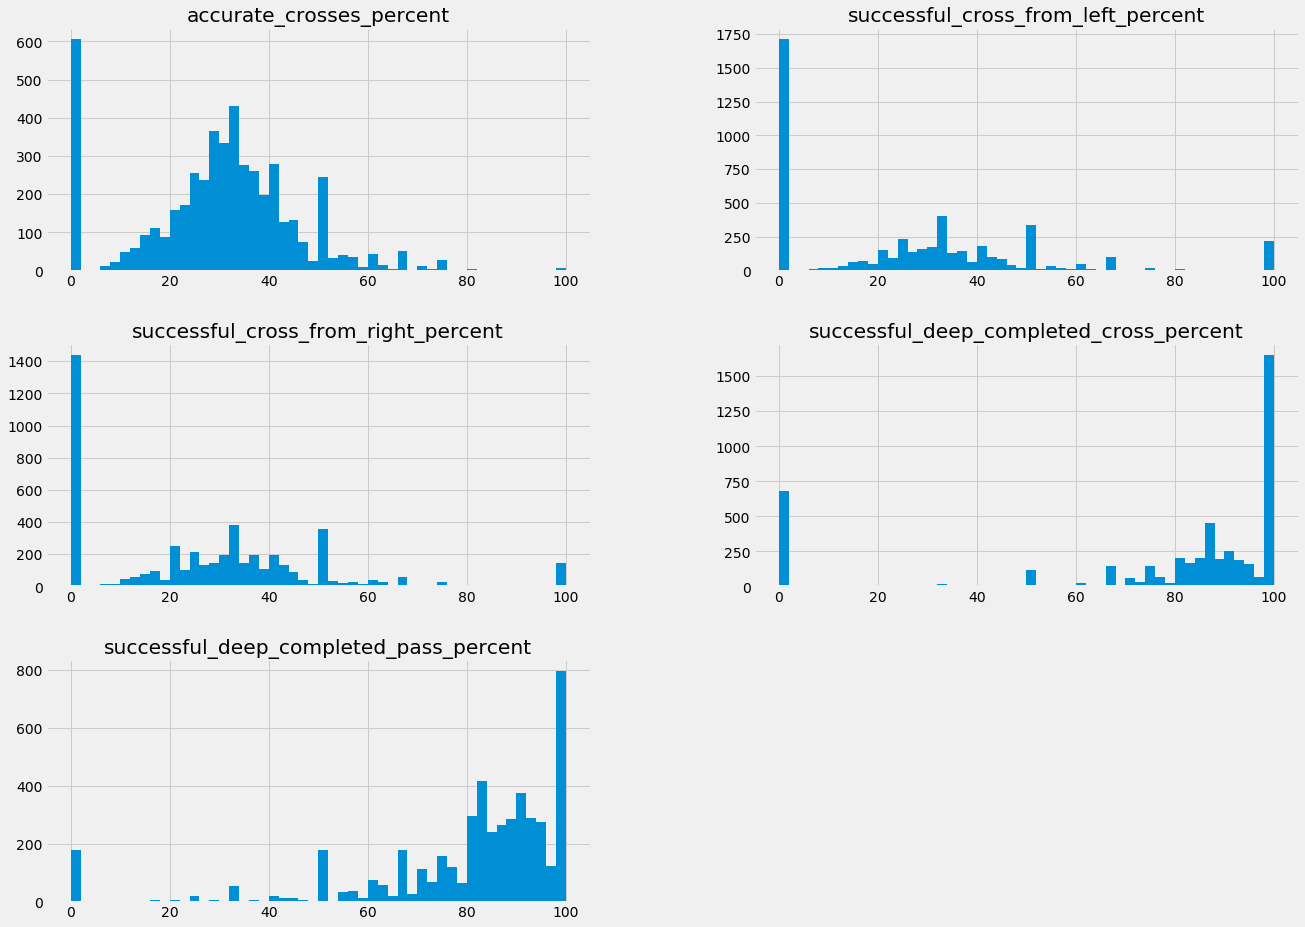

In [514]:
jugadores_11[['accurate_crosses_percent', 'successful_deep_completed_cross_percent',
              'successful_deep_completed_pass_percent', 'successful_cross_from_left_percent', 'successful_cross_from_right_percent']].hist(bins=50, figsize=(20,15))
plt.show();

In [543]:
print(len(jugadores_11[jugadores_11["successful_deep_completed_cross_percent"] == 100]))
print('_____________________________________________________________________________________')
print(len(jugadores_11[jugadores_11["successful_deep_completed_pass_percent"] == 100]))
print('_____________________________________________________________________________________')
print(len(jugadores_11[jugadores_11["successful_cross_from_left_percent"] == 100]))
print('_____________________________________________________________________________________')
print(len(jugadores_11[jugadores_11["successful_cross_from_right_percent"] == 100]))

1649
_____________________________________________________________________________________
787
_____________________________________________________________________________________
216
_____________________________________________________________________________________
147


In [544]:
# elegir los atributos más correlacionados y plottear un scatter matrix. 
attributes = ['market_value', 'minutes_on_field',
              'deep_completed_pass_avg', 
              'progressive_run_avg', 'smart_passes_avg',
              'back_passes_avg', 'accurate_passes_to_final_third_percent']
# técnicamente la diagonal debería ser puras distribuciones uniformes, seaborn entiende que eso sería una mamada y grafica 
# un histograma.

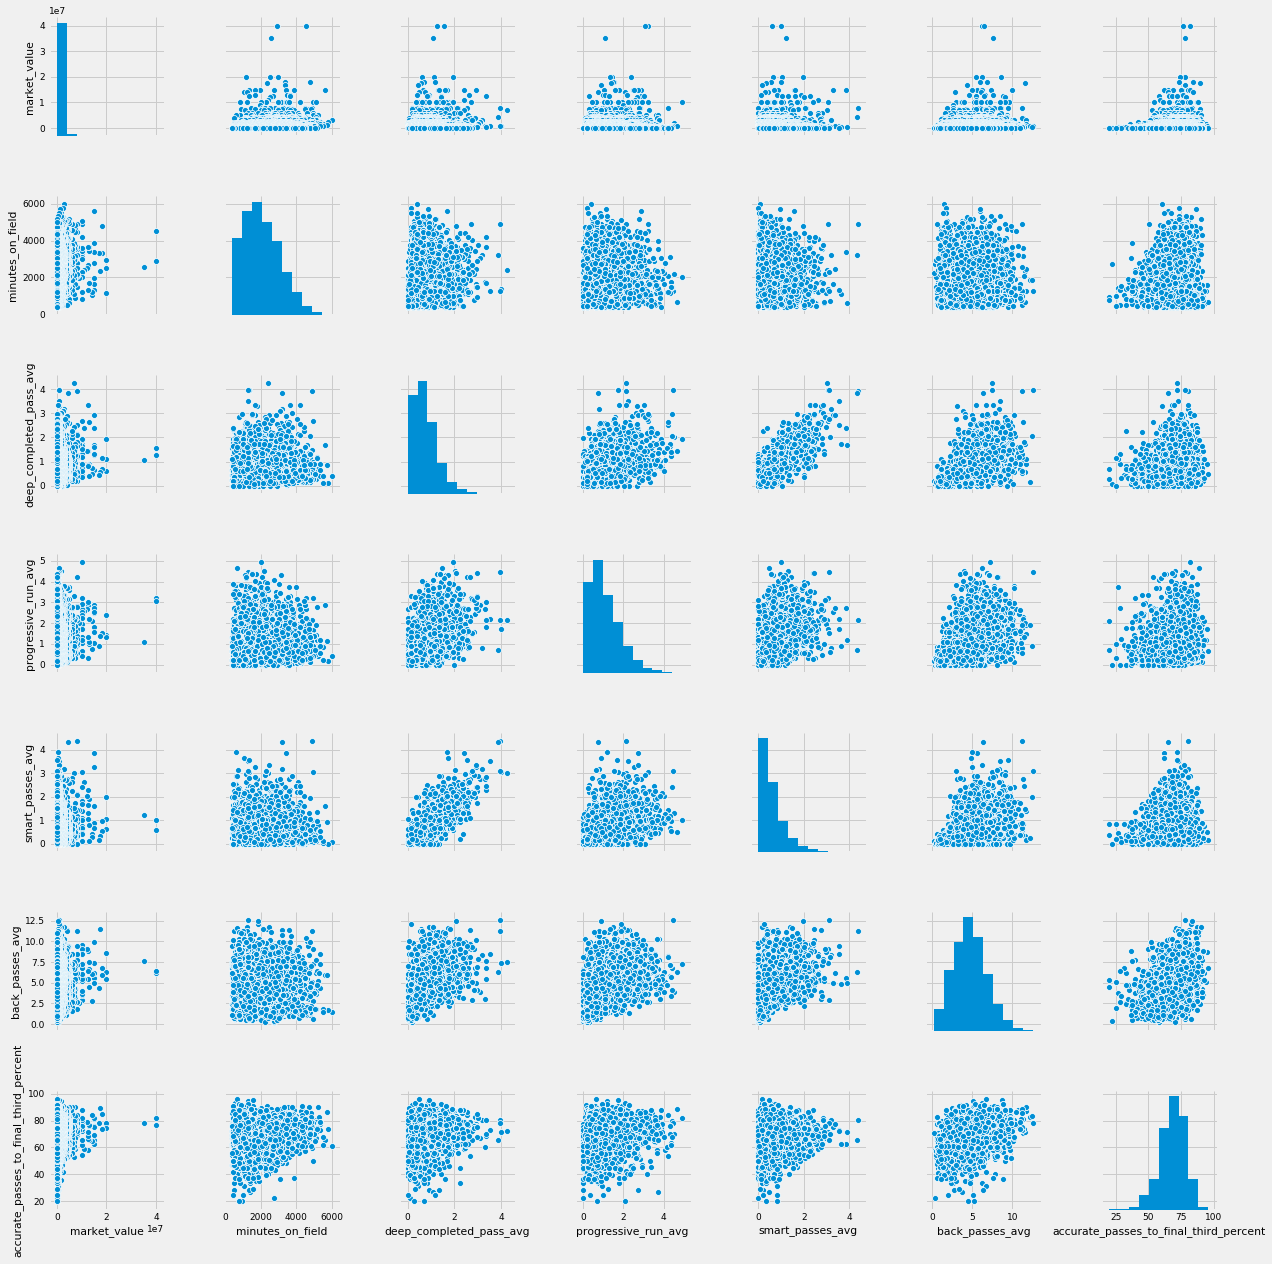

In [288]:
# market value no parece estar linealmente correlacionado con ninguna de las variables relevantes, cuando mucho parece ser 
# una relación cuadrática, por eso la necesidad de más adelante usar Polynomial Features... 
plt.rcParams['figure.figsize'] = (11,8)
plt.rcParams['font.size'] = 9
sns.pairplot(jugadores_11[attributes])

In [520]:
# dividir entre 1000 todos los valores de mercado, luego aplicar StandarScaler a todo el dataframe... 
jugadores_11.market_value

0       40000000
1       40000000
2       35000000
3       20000000
4       20000000
5       20000000
6       18000000
7       18000000
9       17500000
10      17000000
11      15000000
12      15000000
13      15000000
14      15000000
15      15000000
16      15000000
17      15000000
18      14000000
19      14000000
20      13000000
21      13000000
22      13000000
23      12500000
24      12500000
25      12500000
26      12500000
27      12000000
28      11000000
29      10000000
30      10000000
          ...   
8000       20000
8002       20000
8003       20000
8004       20000
8008       20000
8009       20000
8010       20000
8012       20000
8019       20000
8020       20000
8021       20000
8022       20000
8024       20000
8025       20000
8033       20000
8034       20000
8035       20000
8037       20000
8038       20000
8043       20000
8044       20000
8045       20000
8049       20000
8052       20000
8058       20000
8059       20000
8065       20000
8066       200

In [546]:
# Dichas nuevas columnas se formarán a partir de aplicarles una función que toma un número y lo vuelve decimal: 
# rellenamos las nuevas columnas aplicándoles la función 
jugadores_11['Valor de Mercado'] = jugadores_11['market_value'].apply(lambda x: x/1000)
# Comprobemos con una columna 
jugadores_11['Valor de Mercado'][:20]
# looks good.

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    40000.0000
1    40000.0000
2    35000.0000
3    20000.0000
4    20000.0000
5    20000.0000
6    18000.0000
7    18000.0000
9    17500.0000
10   17000.0000
11   15000.0000
12   15000.0000
13   15000.0000
14   15000.0000
15   15000.0000
16   15000.0000
17   15000.0000
18   14000.0000
19   14000.0000
20   13000.0000
Name: Valor de Mercado, dtype: float64

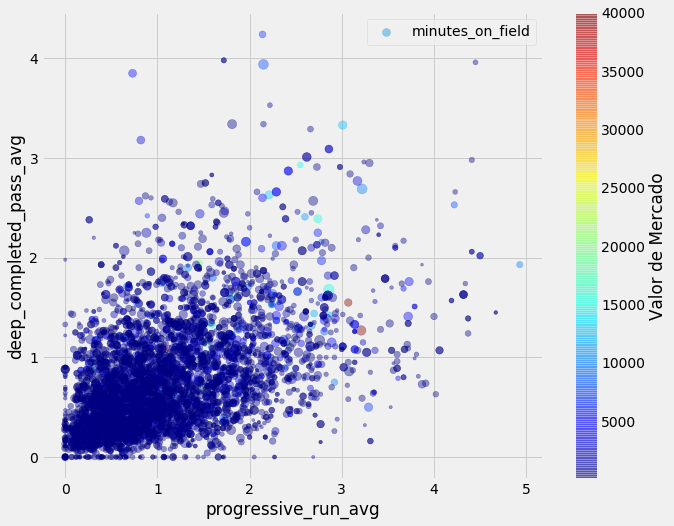

In [522]:
# scatter plots para ver más a detalle las relaciones entre las variables...
jugadores_11.plot(kind="scatter", x="progressive_run_avg", y="deep_completed_pass_avg", alpha=0.4,
s=jugadores_11["minutes_on_field"]/50, label="minutes_on_field",
c="Valor de Mercado", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,8))
plt.legend();

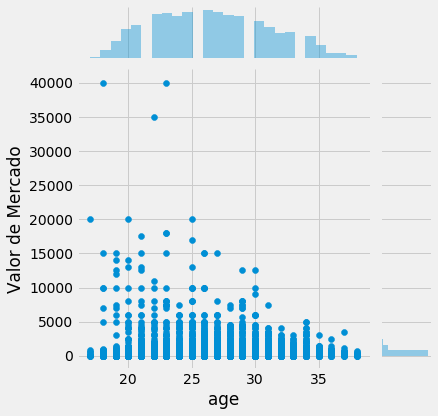

In [523]:
sns.jointplot(x=jugadores_11["age"], y=jugadores_11["Valor de Mercado"], kind='scatter');

Text(0, 0.5, 'Valor de Mercado')

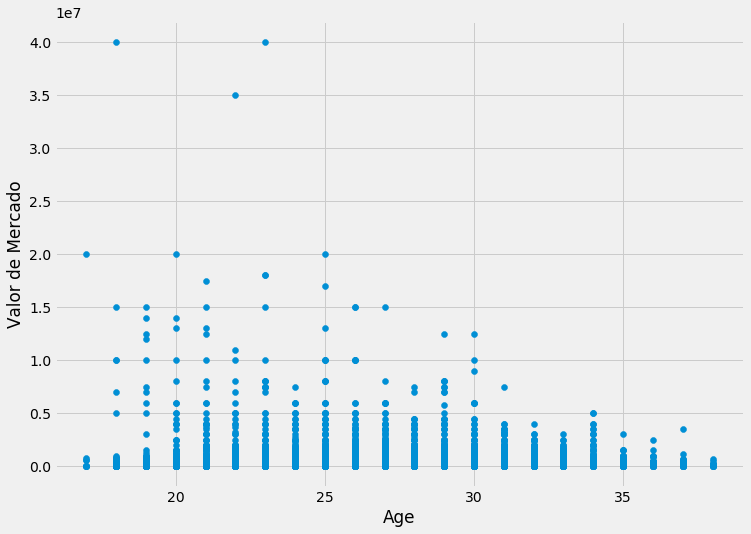

In [524]:
x = jugadores_11.age
y = jugadores_11.market_value
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Valor de Mercado') 

Text(0, 0.5, 'Valor de Mercado')

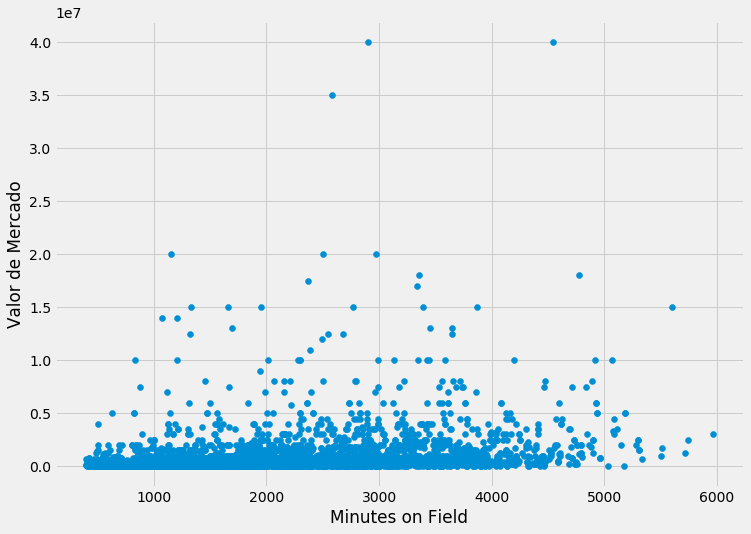

In [525]:
x = jugadores_11.minutes_on_field
y = jugadores_11.market_value
plt.scatter(x,y)
plt.xlabel('Minutes on Field')
plt.ylabel('Valor de Mercado') 

In [547]:
jugadores_12 = jugadores_11.drop(columns=['market_value', 'cross_from_left_avg', 'cross_from_right_avg'])
jugadores_12.shape

(4905, 69)

In [548]:
# aplicar otra vez la función de position_raw... para poder filtrar por posición y checar bien las diferencias y los caros
# por variable relevante en cada posición... 
# Además, para que en el modelo de UML, puedan servir como etiquetas... 

jugadores_12['Posición'] = jugadores_11['primary_position'].apply(position_raw)

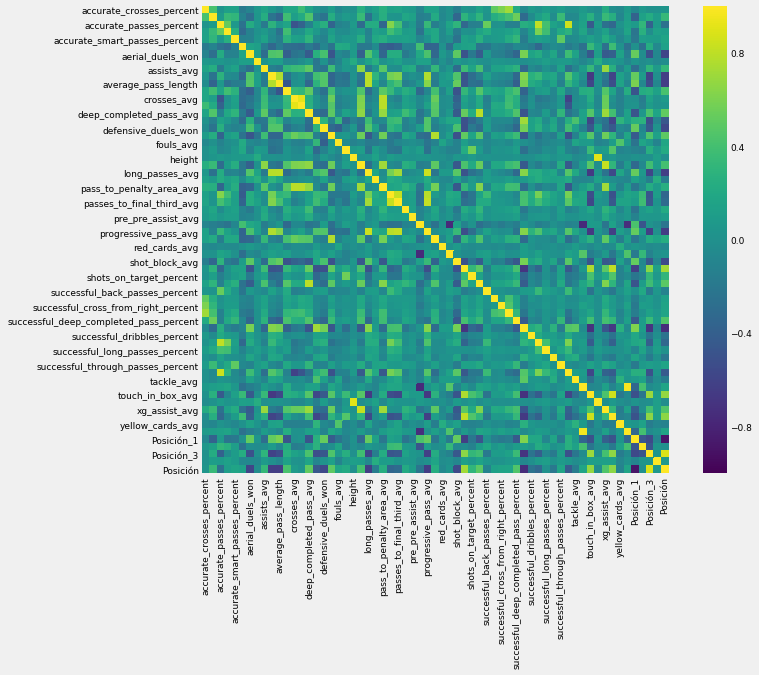

In [408]:
sns.heatmap(jugadores_12.corr(), square=True, cmap='viridis', vmin=-1, vmax=1);

In [549]:
# ver cuáles son las variables que están más correlacionadas con el valor de mercado
matrix = jugadores_12.corr()
matrix["Valor de Mercado"].sort_values(ascending=False)

Valor de Mercado                           1.0000
minutes_on_field                           0.2476
deep_completed_pass_avg                    0.1688
progressive_run_avg                        0.1663
smart_passes_avg                           0.1513
back_passes_avg                            0.1461
accurate_passes_to_final_third_percent     0.1399
dribbles_avg                               0.1266
shots_avg                                  0.1240
xg_assist_avg                              0.1181
xg_shot_avg                                0.1177
touch_in_box_avg                           0.1170
successful_long_passes_percent             0.1162
height                                     0.1118
weight                                     0.1102
accurate_pass_to_penalty_area_percent      0.1090
passes_avg                                 0.1078
key_passes_avg                             0.1037
successful_deep_completed_pass_percent     0.0987
pass_to_penalty_area_avg                   0.0971


In [550]:
# birth_country_name, current_team_name, domestic_competition_name, full_name, primary_position, secondary_position,
# third_position --> get_dummies, parte final de lab-supervised-learning

# full_name como index y dummies para las demás? 

# separar las variables categóricas y las numéricas y sobre las numéricas entrenas el modelo para luego concatenar (PCA - Liga MX)
jugadores_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 8069
Data columns (total 70 columns):
accurate_crosses_percent                   4905 non-null float64
accurate_pass_to_penalty_area_percent      4905 non-null float64
accurate_passes_percent                    4905 non-null float64
accurate_passes_to_final_third_percent     4905 non-null float64
accurate_smart_passes_percent              4905 non-null float64
aerial_duels_avg                           4905 non-null float64
aerial_duels_won                           4905 non-null float64
age                                        4905 non-null int64
assists_avg                                4905 non-null float64
average_long_pass_length                   4905 non-null float64
average_pass_length                        4905 non-null float64
back_passes_avg                            4905 non-null float64
birth_country_name                         4905 non-null object
crosses_avg                                4905 non

In [553]:
# vamos a crear dummies para todas las variables categóricas menos domestic_competition_name... 
print(jugadores_12.shape)
print('_________________________________________________________')
jugadores_13 = pd.get_dummies(jugadores_12, columns=['foot', 'birth_country_name', 'current_team_name',
                                                     'primary_position', 'secondary_position', 'third_position'], drop_first=True)
print(jugadores_13.shape)

(4905, 70)
_________________________________________________________
(4905, 699)


In [561]:
# hay 537 equipos, son demasiadas variables dummy, una opción sería categorizar a los equipos en 
# 'clases' (unas 10) y agregarlos en esas categorías (algo parecido a lo que se hizo con los 
# productos en el (10. ML), y ya teniendo esas categorías les aplicamos dummies),
# sin embargo, ¿cómo hacemos esa categorización? lo más eficiente sería,
# agrupar por equipo y sumar el valor de mercado de todos los jugadores, teniendo la distribución
# del valor de mercado de cada equipo, podríamos crear 10 categorías...)

len(jugadores_12.current_team_name.unique())

537

In [556]:
# todas menos Posición, full_name y domestic_competition_name...

print(list(jugadores_13.columns)[63:])

['Posición', 'foot_both', 'foot_left', 'foot_right', 'birth_country_name_Bolivia', 'birth_country_name_Brazil', 'birth_country_name_Canada', 'birth_country_name_Chile', 'birth_country_name_Colombia', 'birth_country_name_Costa Rica', 'birth_country_name_Ecuador', 'birth_country_name_England', 'birth_country_name_France', 'birth_country_name_Honduras', 'birth_country_name_Mexico', 'birth_country_name_Otro', 'birth_country_name_Panama', 'birth_country_name_Paraguay', 'birth_country_name_Peru', 'birth_country_name_Spain', 'birth_country_name_USA', 'birth_country_name_Uruguay', 'birth_country_name_Venezuela', 'current_team_name_ABC', 'current_team_name_ADR Jicaral', 'current_team_name_AS Fasano', 'current_team_name_Aalesund', 'current_team_name_Aarau', 'current_team_name_Academia Cantolao', 'current_team_name_Academia Puerto Cabello', 'current_team_name_Academico Viseu', 'current_team_name_Agropecuario', 'current_team_name_Ajax', 'current_team_name_Al Ittihad', 'current_team_name_Al Khaleej

In [559]:
jugadores_13.to_csv('wyscout_continente_americano_final.csv')

In [558]:
jugadores_13.head()

,accurate_crosses_percent,accurate_pass_to_penalty_area_percent,accurate_passes_percent,accurate_passes_to_final_third_percent,accurate_smart_passes_percent,aerial_duels_avg,aerial_duels_won,age,assists_avg,average_long_pass_length,...,third_position_RB,third_position_RB5,third_position_RCB,third_position_RCB3,third_position_RCMF,third_position_RCMF3,third_position_RDMF,third_position_RW,third_position_RWB,third_position_RWF
0,28.5700,59.8300,83.3800,81.7500,34.0000,1.2300,25.8100,23,0.0600,25.5500,...,0,0,0,0,0,0,0,0,0,0
1,22.6200,59.0900,82.0200,76.7400,57.8900,2.0500,22.7300,18,0.0600,29.1900,...,0,0,0,0,0,0,0,0,0,0
2,24.2400,45.9000,83.1300,78.1900,28.5700,4.3300,41.1300,22,0.0700,25.9000,...,0,0,0,0,0,0,0,0,0,0
3,23.2600,57.1400,82.3000,77.4000,43.0800,2.7300,36.6700,20,0.0900,36.0300,...,0,0,0,0,1,0,0,0,0,0
4,52.9400,56.2500,79.7000,78.2600,37.5000,4.4500,38.6000,17,0.1600,15.2000,...,0,0,0,0,0,0,0,0,0,0


In [557]:
# Normalizar las variables con MinMaxScaler o bien StandardScaler... (1. ML) 
#from sklearn.preprocessing import MinMaxScaler

# Vamos a estandarizar la columna TotalPop.
#market_values_scale = jugadores_13['Valor de Mercado'].values.reshape(-1,1) # los elementos que teníamos en una dimensión, en una columna
# Aplicar el estandarizador siempre va de la mano con un fit_transform
#jugadores_13['MarketValueScaled'] = MinMaxScaler().fit_transform(market_values_scale)
# notar que nuestos valores van de cero a uno con varianza cero:
#jugadores_13.MarketValueScaled.describe()

In [ ]:


# shuffle rows - (1. ML) -quizás ya no será necesario porque el train-test-split lo hace por ti...

In [71]:
# dataframe con las variables que elegimos quedarnos: 
#kickstarter_variables = kickstarter_classify[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]
# súper súper importante: construir la columna de variables dummy para la variable dependiente: 
#kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'], drop_first=True)
#kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns=['main_category', 'currency'], drop_first=True)


In [74]:
# pruebas típicas antes de hacer la regresión (2. ML)